## Introduction



In our last project we used data to estimate systems of food demand
using different datasets.  An output from that project was as set of
`cfe.Result` objects; these bundle together both data and the results
from the demand system estimation, and can be used for prediction as
well.  

Here we&rsquo;ll explore some of the uses of the `cfe.Result` class, using
an instance created using data from the Indian ICRISAT data.

If you don&rsquo;t already have the latest version of the `cfe` package
installed, grab it, along with some dependencies:



In [1]:
!pip install CFEDemands --upgrade
!pip install xarray
!pip install dvc
!pip install h5netcdf

  Using cached CFEDemands-0.2.7-py2.py3-none-any.whl (36 kB)
  Using cached dvc-2.0.18-py2.py3-none-any.whl (633 kB)
Processing /home/jovyan/.cache/pip/wheels/bc/7d/26/d3e5714967aa183b5c659493fa88daf270295948d0ac277686/pygtrie-2.3.2-py3-none-any.whl
Processing /home/jovyan/.cache/pip/wheels/0f/1b/ca/6263a5227f886599039aee3eed13951a6d44a02ee989ed6eb6/dpath-2.0.1-py3-none-any.whl
  Using cached flatten_dict-0.3.0-py2.py3-none-any.whl (8.2 kB)
Processing /home/jovyan/.cache/pip/wheels/f4/f4/20/d7114a2d97a2e72ce7189a7f63a6fbd2a33ec6ae6010befca5/flufl.lock-3.2-py3-none-any.whl
  Using cached grandalf-0.6-py3-none-any.whl (31 kB)
  Using cached pygit2-1.5.0-cp38-cp38-manylinux2014_x86_64.whl (3.1 MB)
  Using cached jsonpath_ng-1.5.2-py3-none-any.whl (28 kB)
  Using cached GitPython-3.1.14-py3-none-any.whl (159 kB)
  Using cached ply-3.11-py2.py3-none-any.whl (49 kB)
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
Processing /home/jovyan/.cache/pip/wheels/34/2a/24/a490264ae9041fd48f778

In [3]:
import cfe

cfe.Result?

An instance `r` of `cfe.Result` can be made persistent with
`r.to_dataset('my_result.ds')`, which saves the instance &ldquo;on disk&rdquo; in
[NetCDF format](https://en.wikipedia.org/wiki/NetCDF), and can be loaded using `cfe.from_dataset`.  We use
this method below to load data and demand system estimated for the
Indian ICRISAT villages:



In [6]:
r = cfe.from_dataset('./Uganda_small.ds')

r

/opt/conda/lib/python3.8/site-packages/h5netcdf/core.py:769: FutureWarning: String decoding changed with h5py >= 3.0. See https://docs.h5py.org/en/latest/strings.html for more details. Currently backwards compatibility with h5py < 3.0 is kept by decoding vlen strings per default. This will change in future versions for consistency with h5py >= 3.0. To silence this warning set kwarg ``decode_vlen_strings=False``. Setting ``decode_vlen_strings=True`` forces vlen string decoding.
  warnings.warn(msg, FutureWarning, stacklevel=0)


<xarray.Result>
Dimensions:           (i: 74, j: 3737, k: 14, kp: 14, m: 1, t: 4, u: 103)
Coordinates:
  * i                 (i) object 'Matooke(cluster)' ... 'watermelon'
  * k                 (k) object 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 31-50' 'F 51+'
  * t                 (t) int64 2005 2009 2010 2011
  * m                 (m) int64 1
  * u                 (u) object '3 litre basin' ... 'Tot (sachet)'
  * j                 (j) object '1013000201' '1013000202' ... '4193003510'
  * kp                (kp) object 'F 0-3' 'F 14-18' ... 'M 51+' 'M 9-13'
Data variables:
    alpha             (i) float64 nan nan nan 6.664 ... 6.628 4.61 5.958 nan
    beta              (i) float64 nan nan nan 0.2556 ... 0.2245 0.323 0.4712 nan
    delta             (k, i) float64 nan nan nan -0.0201 ... 0.1249 -0.04145 nan
    prices            (t, m, i, u) float64 nan nan nan nan ... nan nan nan nan
    characteristics   (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.0 2.0 2.0 nan
    loglambdas        (j, t, m) float64 -1.218 -0.1435 -0.4431 ... nan nan nan
    a                 (i, t, m) float64 nan nan nan nan nan ... nan nan nan nan
    yhat              (j, t, m, i) float64 nan nan nan 7.066 ... nan nan nan nan
    ce                object None
    cehat             object None
    e                 (i, j, m, t) float64 nan nan nan nan ... nan nan nan nan
    delta_covariance  (i, k, kp) float64 nan nan nan nan nan ... nan nan nan nan
    beta_covariance   object None
    se_delta          (i, k) float64 nan nan nan nan nan ... nan nan nan nan nan
    se_beta           float64 nan
    se_alpha          (i) float64 0.0 0.0 0.0 0.02549 ... 0.01734 0.01922 0.0
    se_a              (i, t, m) float64 nan nan nan nan nan ... nan nan nan nan
    y                 object None
    logp              (t, m, i, u) float64 nan nan nan nan ... nan nan nan nan
    z                 (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.0 2.0 2.0 nan
Attributes:
    firstround:            2005
    min_proportion_items:  0.125
    min_xproducts:         30
    useless_expenditures:  None
    stderr_tol:            0.01
    indices:               Indices(j='j', t='t', m='m', i='i', k='k')
    verbose:               False

Our focus earlier was on estimation, but the result `r` already has
encoded in it the results of that estimation.

There are parameters $\alpha$ (bigger alpha = larger budget share):



In [7]:
r.get_alpha(as_df=True)

i
beans dry                             6.664045
beans fresh                           6.166651
beef                                  7.596403
bread                                 6.531700
cabbages                              5.987894
cassava dry/flour                     7.000972
cassava fresh                         6.561716
chicken                               8.220995
coffee                                4.586281
cooking oil                           6.181261
dodo                                  5.544825
dry/smoked fish                       6.631332
eggs                                  6.238671
expenditure in restaurants on food    7.874761
fresh fish                            7.076956
fresh milk                            7.007019
goat meat                             7.402044
ground nuts pounded                   6.263604
irish potatoes                        6.686252
maize cobs                            6.026852
maize flour                           6.736053
mangoes    

Elasticity parameters $\beta$ (we can&rsquo;t estimate all, so some are missing):

(higher beta = spend more on it as you get wealthier)

In [8]:
r.get_beta(as_df=True).dropna()

i
beans dry                             0.255622
beans fresh                           0.381523
beef                                  0.384351
bread                                 0.568417
cabbages                              0.357247
cassava dry/flour                     0.124855
cassava fresh                         0.313435
chicken                               0.322282
coffee                                0.632619
cooking oil                           0.483203
dodo                                  0.452957
dry/smoked fish                       0.351626
eggs                                  0.420556
expenditure in restaurants on food    0.460684
fresh fish                            0.412433
fresh milk                            0.567437
goat meat                             0.360544
ground nuts pounded                   0.367467
irish potatoes                        0.388275
maize cobs                            0.356432
maize flour                           0.285216
mangoes    

And parameters related to household characteristics $\delta$:

(delta: for every additional 14-18 y.o. female, we expect a 0.0917 increase in spending on 'Cabbages')

In [10]:
r.delta.to_dataframe().unstack('k').dropna()

delta                                \
k                                      F 0-3   F 14-18   F 19-30   F 31-50   
i                                                                            
beans dry                           0.035235  0.133076  0.064638  0.090898   
beans fresh                         0.098333  0.124233  0.120654  0.201325   
beef                                0.004936  0.049122  0.134968  0.108337   
bread                               0.021215  0.116348  0.176450  0.131142   
cabbages                            0.038930  0.091709  0.089148  0.060416   
cassava dry/flour                   0.068200  0.019923 -0.062780  0.017033   
cassava fresh                       0.003492  0.103280  0.064463  0.154521   
chicken                            -0.003726  0.009435  0.065602  0.089813   
coffee                             -0.064571  0.130770  0.140430  0.131590   
cooking oil                        -0.030974  0.089264  0.143023  0.046393   
dodo                               -0.020738  0.074052  0.120486  0.163794   
dry/smoked fish                     0.005613  0.020688  0.088960  0.013434   
eggs                                0.008264  0.118491  0.101522  0.076805   
expenditure in restaurants on food -0.221550  0.015002  0.151885  0.023080   
fresh fish                          0.024925  0.075499  0.120322  0.041352   
fresh milk                          0.089778  0.099212  0.180005  0.090505   
goat meat                          -0.050006  0.062009  0.127635  0.005612   
ground nuts pounded                -0.065921  0.096250  0.098563  0.109459   
irish potatoes                      0.084978  0.075524  0.055754  0.057684   
maize cobs                          0.104363  0.099606  0.011820 -0.031892   
maize flour                         0.075808  0.121107  0.035413  0.070201   
mangoes                             0.058143  0.092691  0.095711  0.180878   
margarine,butter                   -0.092124 -0.016967  0.000648  0.168507   
matooke_1                           0.018800  0.141944  0.216396  0.044091   
millet                              0.135429  0.070086  0.010574  0.069105   
onions                             -0.059114  0.082456  0.164587  0.064157   
oranges                            -0.185347  0.162119  0.203292  0.107010   
other vegetables                   -0.005813  0.111691  0.065563  0.099593   
passion fruits                      0.008146  0.132052  0.184250  0.265699   
rice                                0.052494  0.069365  0.132718  0.059584   
salt                                0.037779  0.067244  0.036350  0.036872   
soda                               -0.013542  0.108745  0.154578  0.012812   
sugar                               0.033302  0.077048  0.186059  0.135880   
sweet bananas                       0.046960  0.179915  0.173887  0.165799   
sweet potatoes fresh                0.024374  0.117154  0.078123  0.092751   
tea                                -0.028303  0.052945  0.128240  0.141927   
tomatoes                           -0.002241  0.087125  0.157349  0.069505   

                                                                            \
k                                      F 4-8     F 51+    F 9-13     M 0-3   
i                                                                            
beans dry                           0.096329  0.146824  0.080202 -0.020105   
beans fresh                         0.088380  0.243703  0.046099  0.003502   
beef                                0.030322  0.055811  0.070274  0.012622   
bread                               0.048413 -0.035845  0.086589 -0.010931   
cabbages                            0.024189  0.058005  0.079683  0.014337   
cassava dry/flour                   0.078190  0.172268  0.114671  0.240597   
cassava fresh                       0.062698  0.145607  0.100125 -0.003535   
chicken                             0.008261  0.135734  0.051132  0.005440   
coffee                              0.044735  0.086108 -0.03

The triple of paramters $(\alpha,\beta,\delta)$ completely describes
the demand system and the corresponding utility function (over the
goods we observe).



## Demands



As mentioned above, we&rsquo;ve estimated the parameters of a Frischian
demand system (demands that depend on prices and the households
marginal utility of expenditures).  But we can *compute* the
corresponding Marshallian (depends on prices and budget) or Hicksian
(depends on prices and the level of utility) demands for this same
population, using the `cfe.Result.demands` method.  

Let&rsquo;s compute Marshallian demands.  Start with a choice of budget $x$
and prices.  We&rsquo;ll use the earliest prices, and focus on
the first market we&rsquo;re interested in.



In [44]:
t = r.firstround  # First round
m = r.coords['m'][0] # First market

x = r.get_predicted_expenditures().sum('i')
median_x = x.where(x>0).sel(t=t,m=m).median('j') # Budget (median household)

# Note selection of prices for 1975 for market A
p = r.prices.sel(t=t,m=m,u='Kilogram (kg)', drop = True).fillna(1).copy()

p.to_dataframe().fillna(1).squeeze()

/opt/conda/lib/python3.8/site-packages/xarray/core/nputils.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


i
Matooke(cluster)           1.000000
Matooke(others)            1.000000
avocado                    1.000000
beans dry                779.503494
beans fresh              800.000000
                           ...     
sweet potatoes dry         1.000000
sweet potatoes fresh       1.000000
tea                      680.000000
tomatoes                2000.000000
watermelon                 1.000000
Name: prices, Length: 74, dtype: float64

Now compute demands.  The object `r` already knows what the estimated
parameters are, and uses those automatically:

**WHAT DOES THIS REPRESENT?** Demands for good in a household that has median budget, for the given prices (above)

Can see what happens if prices double (input 2*p)

All values are in Kg (ie. demand for 1 household = 1.95 kg of beans dry)

--> May need to divide by 10 (or be thoughtful of units) when converting to nutrients

In [55]:
c=r.demands(median_x,2*p)
c

i
beans dry                              1.271306
beans fresh                            1.171873
beef                                   1.365287
bread                                  0.925855
cabbages                              11.854535
cassava dry/flour                      1.264442
cassava fresh                         10.478406
chicken                               19.113263
coffee                                 0.335944
cooking oil                           31.123402
dodo                                  18.811756
dry/smoked fish                        1.239783
eggs                                  20.417110
expenditure in restaurants on food    57.852926
fresh fish                            27.217262
fresh milk                            90.544487
goat meat                              1.161031
ground nuts pounded                    0.971067
irish potatoes                         1.663473
maize cobs                            11.952645
maize flour                           

So we can compute demands.  Let&rsquo;s trace out a demand curve for coconuts:



Text(0, 0.5, 'Price')

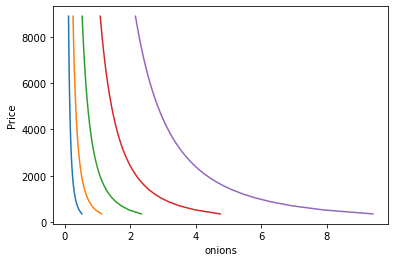

In [58]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

USE_GOOD = 'onions'
    
# Values for prices
ref_price = r.prices.sel(i=USE_GOOD,t=t,m=m,u='Kilogram (kg)')
P = np.linspace(ref_price/5,ref_price*5,50)

def my_prices(p0,p=p,i=USE_GOOD):
    p = p.copy()
    p.loc[i] = p0
    return p

for myx in [median_x*s for s in [.25,.5,1.,2,4]]:
    plt.plot([r.demands(myx,my_prices(p0))[USE_GOOD] for p0 in P],P)

plt.xlabel(USE_GOOD)
plt.ylabel('Price')

And here are Engel curves (response to budget) holding prices fixed:



Text(0.5, 0, 'Budget')

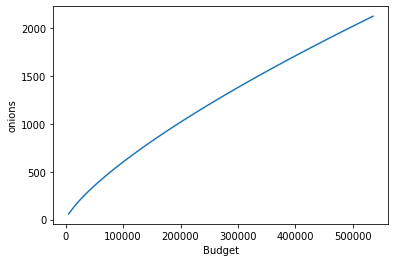

In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

USE_GOOD = 'onions'
    
# Values for prices
ref_price = r.prices.sel(i=USE_GOOD,t=t,m=m,u='Kilogram (kg)')

# Range of budgets to consider
X = np.linspace(median_x/10,median_x*10,50)

plt.plot(X,[r.demands(x,ref_price)[USE_GOOD] for x in X])

plt.ylabel(USE_GOOD)
plt.xlabel('Budget')